In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
#convert this path to windows path
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

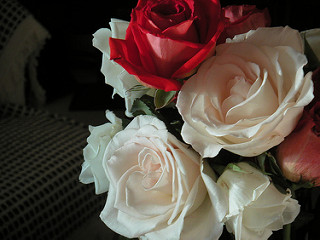

In [8]:
PIL.Image.open(str(roses[1]))

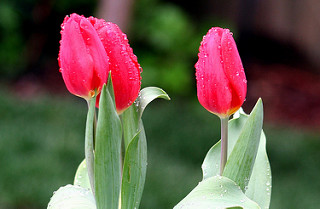

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
#Read flowers images from disk into numpy array using opencv

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_images_dict 

{'roses': [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
  WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
  WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
  WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
  WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
  WindowsPath('

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [15]:
dr= str(flowers_images_dict['roses'][0])
dr

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [16]:
img = cv2.imread(dr)
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [17]:
img.shape

(240, 179, 3)

In [18]:
len(flowers_images_dict.items())

5

In [19]:
#there are different shape of images, so convert all this images in a same shape
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
#build CNN model

In [24]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)  

Epoch 1/5
86/86 [==============================] - 21s 241ms/step - loss: 1.3877 - accuracy: 0.4033
Epoch 2/5
86/86 [==============================] - 22s 254ms/step - loss: 1.0271 - accuracy: 0.5934
Epoch 3/5
86/86 [==============================] - 22s 255ms/step - loss: 0.8733 - accuracy: 0.6661
Epoch 4/5
86/86 [==============================] - 21s 244ms/step - loss: 0.6753 - accuracy: 0.7525
Epoch 5/5
86/86 [==============================] - 20s 228ms/step - loss: 0.4716 - accuracy: 0.8299


In [25]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 66ms/step - loss: 1.2518 - accuracy: 0.6002


[1.2518067359924316, 0.600217878818512]

In [26]:
#Improve Test Accuracy Using Data Augmentation
# Define the dimensions of your input images
#img_height = 256
#img_width = 256
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", ),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

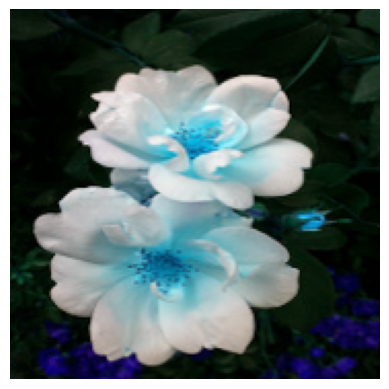

In [27]:
plt.axis('off')
plt.imshow(X[0])

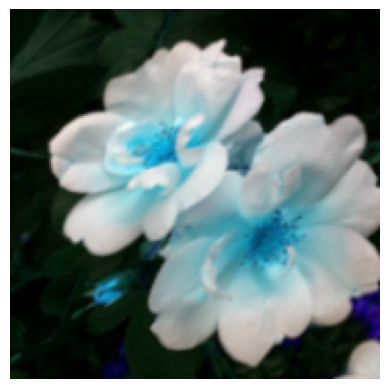

In [28]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [29]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 [==============================] - 28s 312ms/step - loss: 1.3847 - accuracy: 0.4146
Epoch 2/10
86/86 [==============================] - 26s 303ms/step - loss: 1.1040 - accuracy: 0.5447
Epoch 3/10
86/86 [==============================] - 26s 301ms/step - loss: 0.9632 - accuracy: 0.6228
Epoch 4/10
86/86 [==============================] - 26s 300ms/step - loss: 0.9052 - accuracy: 0.6483
Epoch 5/10
86/86 [==============================] - 26s 299ms/step - loss: 0.8448 - accuracy: 0.6781
Epoch 6/10
86/86 [==============================] - 26s 302ms/step - loss: 0.8149 - accuracy: 0.6937
Epoch 7/10
86/86 [==============================] - 26s 307ms/step - loss: 0.7563 - accuracy: 0.7089
Epoch 8/10
86/86 [==============================] - 26s 299ms/step - loss: 0.7296 - accuracy: 0.7220
Epoch 9/10
86/86 [==============================] - 26s 303ms/step - loss: 0.6924 - accuracy: 0.7304
Epoch 10/10
86/86 [==============================] - 26s 297ms/step - loss: 0.6601 - accura

In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 58ms/step - loss: 0.8334 - accuracy: 0.6885


[0.8333796262741089, 0.6884531378746033]